## Testing the z-Entropy PML prior-estimate on the Feder testcase
for different samplings of simulated data and z-samplings in the entropy monte carlo approximation.

In [ ]:
using GynC
using Plots
using Interact
include("../src/eb/plot.jl")

INFO: computing likelihood matrix
INFO: computing likelihood matrix


  2.061299 seconds (6.10 M allocations: 264.474 MB, 13.43% gc time)
(rho_std,nx,ndata,reg,niter,h,zmult) = (1,50,20,1,50,10,300)



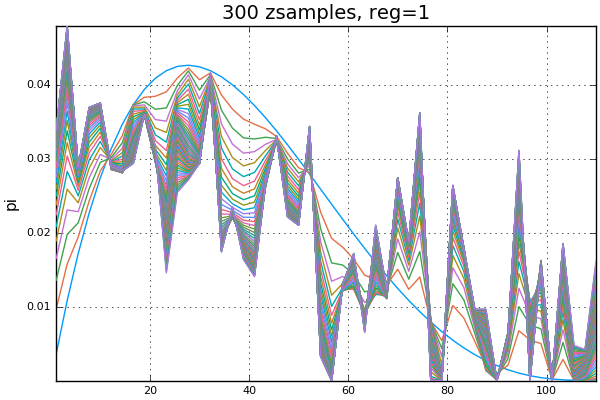

In [2]:
rho_std = 1
nx = 50
ndata = 20

reg = 1
niter = 50
h = 10
zmult=300

srand(1)
xs, ys, datas, _ = GynC.Federn.federexperiment(nx=nx, zmult=1, ndata=ndata, rho_std=rho_std, xmin=1, xmax=110);
w0 = GynC.Federn.wbeta(xs, 110+0.1); # add 0.1 to circumvent 0 weight;

srand(1)
zs = GynC.Federn.perturb.(repmat(ys,zmult), rho_std)

dhz(w) = GynC.dhz(w, ys, zs, rho_std)
dll(w) = GynC.dlogl(w, datas, ys, rho_std)
obj(w) = reg*dhz(w) + (1-reg)*dll(w)

c1 = 1/100
c2 = 1/1000
#hauto = (1-reg) * c1 / ndata + reg*c2  
hauto = h/((1-reg)*(ndata/c1) + reg/c2)


@time ws = GynC.gradientascent(obj, w0, niter, hauto, autodiff=false)

@show rho_std, nx, ndata, reg, niter, h, zmult

plot(xs, ws[1:1:end], yaxis="\pi", title="$zmult zsamples, reg=$reg", legend=false)#, ylimits=(0,0.15)) 


Interact.Slider{Int64}(Signal{Int64}(25, nactions=0),"i",25,1:50,"d",true)

(rho_std,nx,ndata,reg,niter,h,zmult) = (1,50,20,1,50,10,300)



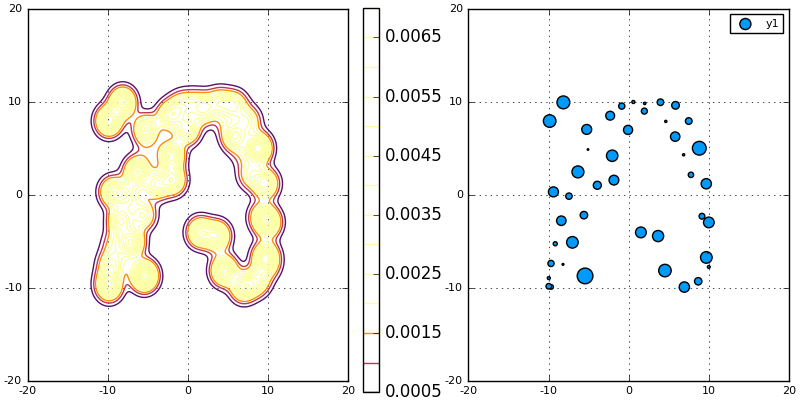

In [7]:
@show rho_std, nx, ndata, reg, niter, h, zmult

@manipulate for i in 1:length(ws)
    w = ws[i]
    lims = ()
    p1=plot_kde(ys, w, bandwidth = rho_std, xlim=(-20,20), ylim=(-20,20), clim=(0,0.002))
    p2=scatter(unfoldcols(ys), ms=w*nx*5, xlim=(-20,20), ylim=(-20,20))
    #p3=scatter(unfoldcols(zs), ms=w*300, xlim=(-20,20), ylim=(-20,20))
    plot(p1,p2, size=(800,400), layout=(1,2))
end


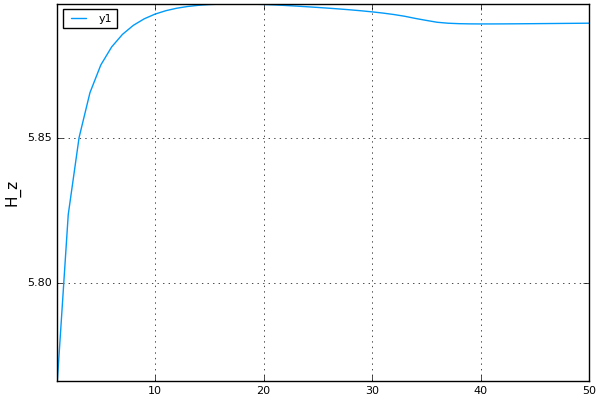

In [4]:
hz(w) = GynC.hz(w, ys, zs, rho_std)
ll(w) = GynC.logLw(w, ys, datas, rho_std)
#gr()
plot(hz.(ws), yaxis="H_z") |> display
#plot(ll.(ws), yaxis="logL") |> display
#plot((1-reg)*(ll.(ws)) + reg*hz.(ws), yaxis="obj (reg=$reg)") |> display
;


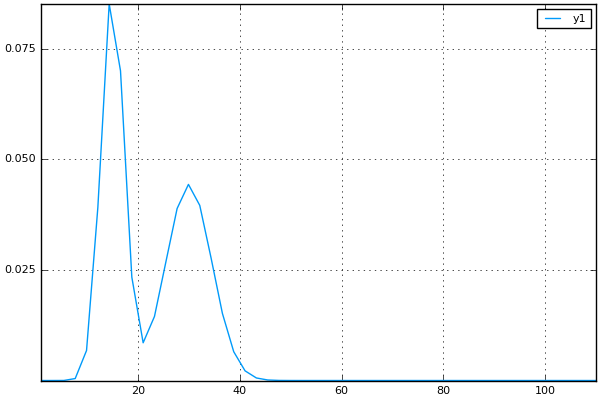

In [5]:
plot_prior() = plot(xs, Distributions.pdf(GynC.Federn.prior, xs))

plot_prior()


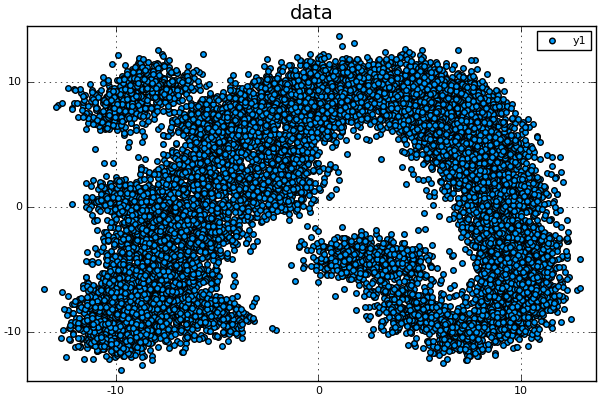

In [6]:
function plot_zdata(datas)
    zxs = map(x->x[1], datas)
    zys = map(x->x[2], datas)
    scatter(zxs,zys, title="data")
end


plot_zdata(datas)
plot_zdata(zs)